In [1]:
import sys
sys.path.append('/home/fenglab/Desktop/transdiff_GRN/src/')

import gzip
from glob import glob
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

from PoLoBag import *

#### Reformat RPM from each sample

In [3]:
files = sorted(glob('./../../data/GSE208199/raw/*.txt.gz'))

In [32]:
d = {}
for f in files:
    with gzip.open(f,'rb') as f:
        lst = [x.decode('utf8').strip() for x in f.readlines()]
    d[lst[0].split('\t')[1]] = [n.split('\t')[1] for n in lst][1:]
geneids = [n.split('\t')[0] for n in lst][1:]

In [34]:
df = pd.DataFrame(d, index=geneids)
df.index.name='geneid'

In [36]:
df.to_csv('./../../data/GSE208199/matrix.csv')

#### Select most differentially expressed genes between groups and time points

In [13]:
def group_anova(geneid, df):
    '''2 way anova'''
    lst_treatment = (['Ascl1p']*2+['Ascl1n']*2)*3+(['Ngn2p']*2+['Ngn2n']*2)*3
    lst_day = (['d3']*4+['d4']*4+['d6']*4)*2
    df_gene = pd.DataFrame(df.loc[geneid])
    df_gene['treatment'] = lst_treatment
    df_gene['day'] = lst_day
    df_melt = pd.melt(df_gene, id_vars=['treatment', 'day'], value_vars=[geneid])
    model = ols('value ~ C(treatment) + C(day) + C(treatment):C(day)', data = df_melt).fit()
    table = sm.stats.anova_lm(model, typ = 2)
    result = np.array(table['PR(>F)'][:3])
    return result

In [5]:
df = pd.read_csv('./../../data/GSE208199/matrix.csv').set_index('geneid')
df = np.log2(df+1)

In [6]:
df = df.drop(columns=['Ascl1_ESC_1', 'Ascl1_ESC_2', 'Ascl1_D2_1', 'Ascl1_D2_2',
                 'Ngn2_ESC_1', 'Ngn2_ESC_2', 'Ngn2_D2_combi_1', 'Ngn2_D2_combi_2'])
df = df[df.max(axis=1)>2]

In [8]:
df['mean'] = df.to_numpy().mean(axis=1)
df['0_ct'] = (df==0).to_numpy().sum(axis=1)

In [9]:
df = df[(df['mean']>0)&(df['0_ct']<=12)]
df = df[~df.index.duplicated()]
df = df.drop(columns=['mean','0_ct'])

In [14]:
anova_ls = np.empty((len(df), 3))
for n in range(len(df)):
    anova_ls[n, :] = group_anova(list(df.index)[n], df)
dfpval = pd.DataFrame(anova_ls, index = df.index, columns = ['treatment', 'day', 'interaction'])

In [29]:
lst1 = list(dfpval.sort_values(by = 'treatment')[:450].index)
lst2 = list(dfpval.sort_values(by = 'day')[:450].index)

In [40]:
df = pd.read_csv('./../../data/GSE208199/matrix.csv').set_index('geneid')
df = df.drop(columns=['Ascl1_ESC_1', 'Ascl1_ESC_2', 'Ascl1_D2_1', 'Ascl1_D2_2',
                 'Ngn2_ESC_1', 'Ngn2_ESC_2', 'Ngn2_D2_combi_1', 'Ngn2_D2_combi_2'])

In [41]:
df[df.index.isin(lst1+lst2)].to_csv('./../../data/GSE208199/grn_expression_t3.txt', sep='\t')

In [46]:
lst1

['Tfap2b',
 'Olig2',
 'Pou3f3',
 'Clmp',
 'Inppl1',
 'Dpysl3',
 'Zcchc24',
 'Sez6l2',
 'Ccna2',
 'Rab6b',
 'Ap1s2',
 'Prr5l',
 'Rufy3',
 'Ank3',
 'Sv2a',
 'Spock1',
 'Bex1',
 'Tpm2',
 'Ccnf',
 'Trim67',
 'Lmnb1',
 'Nop58',
 'Pou4f1',
 'Grik1',
 'Synpo2l',
 'Gprasp2',
 'Mcm2',
 'Gnao1',
 'Lmx1b',
 'Actn1',
 'Stmn2',
 'Nav3',
 'Trim2',
 'Ntng1',
 'Mapt',
 'Arpc1b',
 'Srgap1',
 'Mki67',
 'Atp1b1',
 'Cpne6',
 'Ngfr',
 'Map6',
 'Cited4',
 'Prlr',
 'Pcdh8',
 'Ret',
 'Efr3b',
 'Plpp3',
 'Id2',
 'Racgap1',
 'St6galnac5',
 'Vit',
 'Scg3',
 'Eef1b2',
 'Dlx1',
 'Cartpt',
 'Kcnk10',
 'Hand1',
 'Eppk1',
 'Isl1',
 'Mt2',
 'Tcf7l1',
 'Hrc',
 'Phactr1',
 'Sv2c',
 'Lbr',
 'Myo10',
 'Dhfr',
 'Kif5a',
 'Phlda2',
 'Sox9',
 'Rbpms2',
 'Yap1',
 'Krt19',
 'Cnrip1',
 'Plk1',
 'Dll3',
 'AU020206',
 'Nell2',
 'Thsd7a',
 'Sfrp2',
 'Palld',
 'Neurod1',
 'L1td1',
 'Csrnp3',
 'Rpl22',
 'Frzb',
 'Rbfox2',
 'Nuf2',
 'Ednrb',
 'Usp29',
 'Snap23',
 'Birc5',
 'Fgf4',
 'Islr2',
 'Ccnb1',
 'Mtus2',
 'Stra8',
 'Ncapd2',
 '

In [47]:
lst2

['Olig2',
 'Tfap2a',
 'Pou3f1',
 'Lmx1b',
 'Calb2',
 'Pou3f3',
 'Tpm2',
 'Rassf4',
 'Dll3',
 'Slc27a2',
 'Clmp',
 'Usp29',
 'Inppl1',
 'Pou2f2',
 'Pantr1',
 'Dner',
 'Chl1',
 'Cbln1',
 'Sv2a',
 'Mdk',
 'Tfap2b',
 'Tnrc18',
 'Mab21l2',
 'Zcchc24',
 'Rai2',
 'Isl1',
 'Gpm6a',
 'Bcl11a',
 '3110039I08Rik',
 'Mtus2',
 'Igf2bp1',
 'Cux2',
 'Lmx1a',
 'Actn1',
 'Mcm2',
 'Sulf1',
 'Npas3',
 'C1ql4',
 'Hoxc5',
 'Cadm2',
 'Ppp1r17',
 'Met',
 'Atp1b1',
 'Grasp',
 'Msn',
 'Pbx3',
 'Eif4e3',
 'Plk3',
 'Lypla1',
 'Cbx4',
 'Megf11',
 'Cacng4',
 'Mapt',
 'Dusp14',
 'Cdh7',
 'Cyp26b1',
 'Ptprd',
 'Rbpms2',
 'Kcnip3',
 'Nfia',
 'Prtg',
 'Neurod4',
 'Mir124-2hg',
 'Sox11',
 'Nr2f1',
 'Ntng1',
 'Slc35f1',
 'Pcdh9',
 'Dlx1',
 'Nfil3',
 'Hoxc4',
 'Trim67',
 'Timp3',
 'Slc32a1',
 'Mt2',
 'Pou3f4',
 'Adgrg1',
 'Caly',
 'Greb1l',
 'Grik1',
 'Tmem130',
 'Myo10',
 'Nr6a1',
 'Thsd7a',
 'Lrfn5',
 'Sh3bp5',
 'Tanc2',
 'Gm45768',
 'Ccdc184',
 'C130021I20Rik',
 'Ccna2',
 'Eif4b',
 'Eef1b2',
 'Rpl13a',
 'Vangl2',
 'Sno

#### Check sample separation by PCA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family']='arial'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
with open('./../../data/GSE208199/grn_expression_t3.txt', 'r') as f:
    lines = f.readlines()

In [44]:
df = pd.DataFrame([line[:-2].split('\t') for line in lines[1:]], columns=lines[0][:-2].split('\t'))
df = df.set_index('geneid')

In [45]:
pc_scale = np.log2(df.to_numpy(float)+1).T
pca = PCA(n_components=2)
pca.fit(pc_scale)
pca_value = pca.transform(pc_scale)
pc_r = pca.explained_variance_ratio_*100

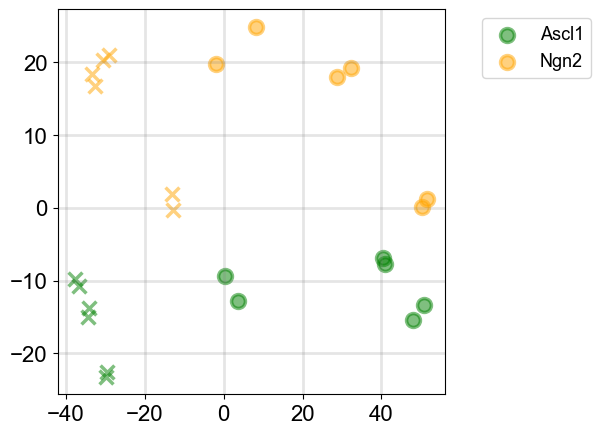

In [48]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
rcParams['font.family']='arial'
rcParams.update({'font.size': 16})
plt.figure(figsize=(5, 5))

plt.scatter(pca_value[:2, 0], pca_value[:2,1], s=100, marker='o',linewidths=2.5,
            alpha=0.5, edgecolors='green', color = 'green', label='Ascl1')
plt.scatter(pca_value[2:4, 0], pca_value[2:4,1], s=100, marker='x',linewidths=2.5,
            alpha=0.5, color = 'green')
plt.scatter(pca_value[4:6, 0], pca_value[4:6,1], s=100, marker='o',linewidths=2.5,
            alpha=0.5, edgecolors='green', color = 'green')
plt.scatter(pca_value[6:8, 0], pca_value[6:8,1], s=100, marker='x',linewidths=2.5,
            alpha=0.5, color = 'green')
plt.scatter(pca_value[8:10, 0], pca_value[8:10,1], s=100, marker='o',linewidths=2.5,
            alpha=0.5, edgecolors='green', color = 'green')
plt.scatter(pca_value[10:12, 0], pca_value[10:12,1], s=100, marker='x',linewidths=2.5,
            alpha=0.5, color = 'green')

plt.scatter(pca_value[12:14, 0], pca_value[12:14,1], s=100, marker='o',linewidths=2.5,
            alpha=0.5, edgecolors='orange', color = 'orange', label='Ngn2')
plt.scatter(pca_value[14:16, 0], pca_value[14:16,1], s=100, marker='x',linewidths=2.5,
            alpha=0.5, color = 'orange')
plt.scatter(pca_value[16:18, 0], pca_value[16:18,1], s=100, marker='o',linewidths=2.5,
            alpha=0.5, edgecolors='orange', color = 'orange')
plt.scatter(pca_value[18:20, 0], pca_value[18:20,1], s=100, marker='x',linewidths=2.5,
            alpha=0.5, color = 'orange')
plt.scatter(pca_value[20:22, 0], pca_value[20:22,1], s=100, marker='o',linewidths=2.5,
            alpha=0.5, edgecolors='orange', color = 'orange')
plt.scatter(pca_value[22:24, 0], pca_value[22:24,1], s=100, marker='x',linewidths=2.5,
            alpha=0.5, color = 'orange')
plt.grid(linewidth=2, alpha=0.2, color='grey')
plt.legend(bbox_to_anchor=(1.4,1), prop={'size':13})


#### GRN inference

In [49]:
df.columns

Index(['Ascl1_D3_GFPpos_1', 'Ascl1_D3_GFPpos_2', 'Ascl1_D3_GFPneg_1',
       'Ascl1_D3_GFPneg_2', 'Ascl1_D4_GFPpos_1', 'Ascl1_D4_GFPpos_2',
       'Ascl1_D4_GFPneg_1', 'Ascl1_D4_GFPneg_2', 'Ascl1_D6_GFPpos_1',
       'Ascl1_D6_GFPpos_2', 'Ascl1_D6_GFPneg_1', 'Ascl1_D6_GFPneg_2',
       'Ngn2_D3_GFPpos_1', 'Ngn2_D3_GFPpos_2', 'Ngn2_D3_GFPneg_1',
       'Ngn2_D3_GFPneg_2', 'Ngn2_D4_GFPpos_1', 'Ngn2_D4_GFPpos_2',
       'Ngn2_D4_GFPneg_1', 'Ngn2_D4_GFPneg_2', 'Ngn2_D6_GFPpos_1',
       'Ngn2_D6_GFPpos_2', 'Ngn2_D6_GFPneg_1', 'Ngn2_D6_GFPneg_'],
      dtype='object')

In [7]:
infile = './../../data/GSE208199/grn_expression_t3.txt'
outfile_prefix = './../../results/GSE208199/GRN/'

treatments = ['Ascl1p', 'Ascl1n', 'Ngn2p', 'Ngn2n']

sample_select = {'Ascl1p':np.array([1,1,0,0,1,1,0,0,1,1,0,0,
                                    0,0,0,0,0,0,0,0,0,0,0,0]),
                 'Ascl1n':np.array([0,0,1,1,0,0,1,1,0,0,1,1,
                                    0,0,0,0,0,0,0,0,0,0,0,0]),
                 'Ngn2p':np.array([0,0,0,0,0,0,0,0,0,0,0,0,
                                   1,1,0,0,1,1,0,0,1,1,0,0]),
                 'Ngn2n':np.array([0,0,0,0,0,0,0,0,0,0,0,0,
                                   0,0,1,1,0,0,1,1,0,0,1,1])
                }

In [8]:
for seed in range(2,6):
    compute = PoLoBag(samples = 24, random_seed=seed)
    for treatment in treatments:
        compute.infer_from_file(infile, f'{outfile_prefix}{treatment}_{seed}_t3.txt', 
                                select=(sample_select[treatment]==1))